[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                            SPY         SPY         SPY         SPY   
Date                                                                        
2024-01-02 00:00:00+00:00  468.234619  472.649994  473.670013  470.489990   
2024-01-03 00:00:00+00:00  464.410675  468.790009  471.190002  468.170013   
2024-01-04 00:00:00+00:00  462.914764  467.279999  470.959991  467.049988   
2024-01-05 00:00:00+00:00  463.548798  467.920013  470.440002  466.429993   
2024-01-08 00:00:00+00:00  470.166382  474.600006  474.750000  468.299988   

Price                            Open     Volume  
Ticker                            SPY        SPY  
Date                                              
2024-01-02 00:00:00+00:00  472.160004  123623700  
2024-01-03 00:00:00+00:00  470.429993  103585900  
2024-01-04 00:00:00+00:00  468.299988   84232200  
2024-01-05 00:00:00+00:00  467.489990   86060800  
2024-01-08 00:00:00+00:00 

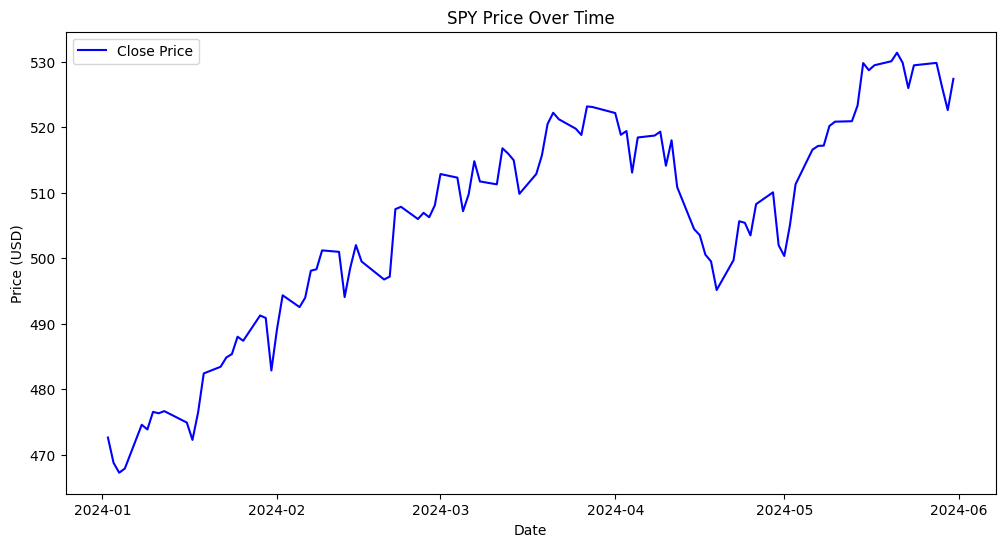

Significant Volume Days:
Price                         Volume
Ticker                           SPY
Date                                
2024-01-02 00:00:00+00:00  123623700
2024-01-19 00:00:00+00:00  110733300
2024-01-31 00:00:00+00:00  126011100
2024-02-13 00:00:00+00:00  113099200
2024-03-14 00:00:00+00:00  110171800


TypeError: only length-1 arrays can be converted to Python scalars

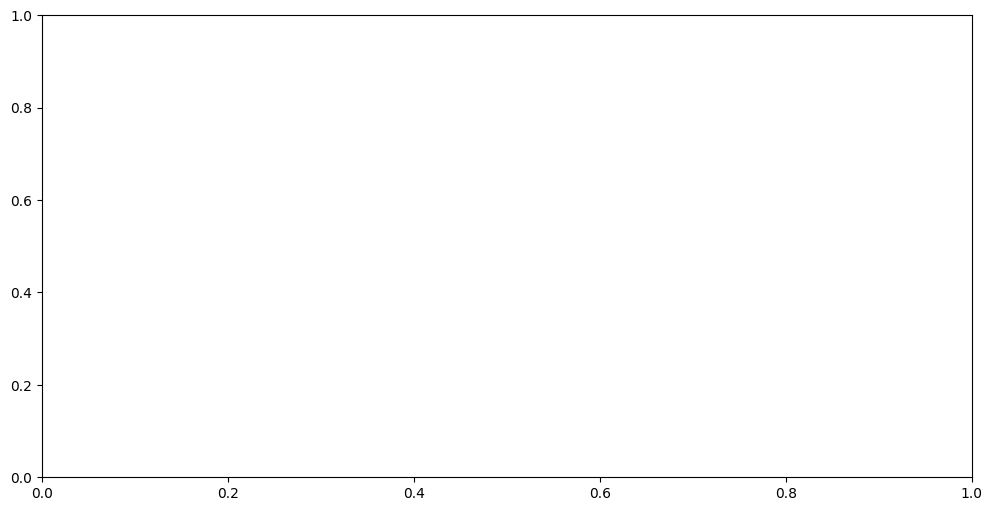

In [6]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 44,
   "id": "0a2233ab-8d31-464e-8b25-42c297896a56",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Here are the results from scraping: \n",
      "\n",
      "       Source                                                                                                                                                                                                                                          Headline\n",
      "Yahoo Finance                                                                                                                                                                                              Trump's Treasury pick emerges as key stumbling block\n",
      "Yahoo Finance                                                                                                                                                                                Nvidia slips before earnings on reports of Blackwell server issues\n",
      "Yahoo Finance                                                                                                                                                             'Oracle of Wall Street' says home prices need to fall 20%    Fortune • 46 minutes ago\n",
      "Yahoo Finance                                                                                                                           Trump team weighs pairing Warsh at Treasury, Bessent on NEC   Bloomberg • 48 minutes ago   SEIC   +0.44%   JPM   -0.11%\n",
      "Yahoo Finance                                                                                                                      Newman: My Trump trade went bust — with a consolation prize   Yahoo Finance • 2 hours ago   BTC-USD   +2.65%   DJT   +16.65%\n",
      "       Reddit Tesla stock pops 8% in premarket after report Trump wants to relax U.S. self-driving rules\\n  \\n\\n\\n\\n\\n\\n\\n    News\\n  \\n\\n\\n\\n\\n\\n\\n\\nhttps://www.cnbc.com/2024/11/18/tesla-tsla-stock-up-on-report-trump-wants-to-ease-self-driving-rules.html\n",
      "       Reddit       Michael Saylor's MicroStrategy Added Additional 51,780 Bitcoin for $4.6B\\n  \\n\\n\\n\\n\\n\\n\\n    News\\n  \\n\\n\\n\\n\\n\\n\\n\\nhttps://www.coindesk.com/markets/2024/11/18/michael-saylors-microstrategy-added-additional-51780-bitcoin-for-46b/amp/\n"
     ]
    }
   ],
   "source": [
    "from dexscreener import DexscreenerClient\n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "import yfinance as yf  # For fetching historical data\n",
    "import datetime\n",
    "import requests\n",
    "from bs4 import BeautifulSoup\n",
    "from yahoo_fin import news\n",
    "\"\"\"\n",
    "# Define the ticker and date range\n",
    "ticker = \"SPY\" \n",
    "start_date = \"2024-01-01\"\n",
    "end_date = \"2024-06-01\"\n",
    "\n",
    "# Fetch data\n",
    "data = yf.download(ticker, start=start_date, end=end_date)\n",
    "\n",
    "# Display the first few rows\n",
    "print(data.head())\n",
    "\n",
    "# Plot the closing price\n",
    "plt.figure(figsize=(12, 6))\n",
    "plt.plot(data['Close'], label='Close Price', color='blue')\n",
    "plt.title(f'{ticker} Price Over Time')\n",
    "plt.xlabel('Date')\n",
    "plt.ylabel('Price (USD)')\n",
    "plt.legend()\n",
    "plt.show()\n",
    "\n",
    "mean_volume = data['Volume'].mean()\n",
    "std_dev_volume = data['Volume'].std()\n",
    "\n",
    "# Define threshold for significant volume (2 times the stdv)\n",
    "threshold = mean_volume + 2 * std_dev_volume\n",
    "\n",
    "# Identify significant volume days\n",
    "data['Significant_Volume'] = data['Volume'] > threshold\n",
    "\n",
    "# Display significant volume days\n",
    "significant_days = data[data['Significant_Volume']]\n",
    "print(\"Significant Volume Days:\")\n",
    "print(significant_days[['Volume']])\n",
    "\n",
    "# Plot volume with significant days highlighted\n",
    "plt.figure(figsize=(12, 6))\n",
    "plt.bar(data.index, data['Volume'], label='Daily Volume', color='purple', alpha=0.7)\n",
    "plt.bar(significant_days.index, significant_days['Volume'], label='Significant Volume', color='red')\n",
    "plt.title(f'{ticker} Daily Trading Volume (Significant Days Highlighted)')\n",
    "plt.xlabel('Date')\n",
    "plt.ylabel('Volume')\n",
    "plt.legend()\n",
    "plt.show()\n",
    "\n",
    "# Create a Ticker object for Yahoo Finance\n",
    "yahoo_ticker = yf.Ticker(\"YHOO\")\n",
    "\n",
    "# Access news headlines\n",
    "news_headlines = yahoo_ticker.news\n",
    "\n",
    "# Create a list of dictionaries containing headlines and dates\n",
    "articles = [{'title': headline['title'], 'date': headline['providerPublishTime']} for headline in news_headlines]\n",
    "\n",
    "# Convert the list of articles to a DataFrame\n",
    "df = pd.DataFrame(articles)\n",
    "\n",
    "# Convert the 'date' column to datetime format\n",
    "df['date'] = pd.to_datetime(df['date'], unit='s')\n",
    "\n",
    "# Display the DataFrame\n",
    "print(df)\n",
    "\"\"\"\n",
    "print(\"Here are the results from scraping: \\n\")\n",
    "\n",
    "#WEB SCRAPING, fill in 0 for path 2 if you cant find/dont want two paths\n",
    "\n",
    "# Define the sources and class names\n",
    "database = [\n",
    "    [\"https://finance.yahoo.com/\", \"content yf-1qcp8cc\", \"clamp yf-1qcp8cc\", \"Yahoo Finance\"],\n",
    "    [\"https://www.reddit.com/r/wallstreetbets/\", \"col-start-1 col-end-2 row-start-2 row-end-3 overflow-hidden\", \n",
    "     \"block font-semibold text-neutral-content-strong m-0 visited:text-neutral-content-weak text-16 xs:text-18  mb-2xs xs:mb-xs  overflow-hidden\", \"Reddit\"]\n",
    "]\n",
    "\n",
    "def CollectNews(website, path1, path2):\n",
    "    response = requests.get(website)\n",
    "    soup = BeautifulSoup(response.text, \"html.parser\")\n",
    "    headlines = []\n",
    "    \n",
    "    try:\n",
    "        # Attempt to get the first 5 headlines (if they exist)\n",
    "        for item in soup.find_all(class_=path1, limit=5):\n",
    "            try:\n",
    "                headline = item.find(class_=path2).get_text()\n",
    "                headlines.append(headline.strip())\n",
    "            except:\n",
    "                # In case the second class is not found, get the headline text without it\n",
    "                headlines.append(item.get_text().strip())\n",
    "    except:\n",
    "        # If path1 class is not found, return an empty list\n",
    "        headlines = []\n",
    "    \n",
    "    return headlines\n",
    "\n",
    "# List to hold all the data\n",
    "all_headlines = []\n",
    "\n",
    "# Loop over each source and collect headlines\n",
    "for source in database:\n",
    "    url, path1, path2, source_name = source\n",
    "    headlines = CollectNews(url, path1, path2)\n",
    "    \n",
    "    # Add the source name to each headline entry\n",
    "    for headline in headlines:\n",
    "        all_headlines.append({\"Source\": source_name, \"Headline\": headline})\n",
    "\n",
    "# Create a DataFrame from the collected data\n",
    "df = pd.DataFrame(all_headlines)\n",
    "\n",
    "# Display the DataFrame nicely\n",
    "print(df.to_string(index=False))\n",
    "\n",
    "\n",
    "\n",
    "\n",
    "\n",
    "\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "e43a9a67-80b2-4965-803f-3ae4e939ed3b",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.8"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}